In [1]:
!pip install --upgrade segments-ai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 6.6 MB/s eta 0:00:00
  Created wheel for segments-ai: filename=segments_ai-1.0.23-py3-none-any.whl size=37566 sha256=a3b7d1fa32a05235ed9000e66a793d6eef29a168479de558957e0559291bfe17
  Stored in directory: /root/.cache/pip/wheels/fe/4c/f9/1ef800a67632027b047d0de89cb1d1027fab2498008c25ca36
Successfully built segments-ai


In [2]:
import os
from segments import SegmentsClient
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from segments.utils import load_image_from_url, load_label_bitmap_from_url, get_semantic_bitmap



# You can find your api key at https://segments.ai/account
api_key = "e022f204199f265634b16cf18485bdd53cb7becf"
client = SegmentsClient(api_key)
dataset = 'etaylor/trichomes_moment_lens_instance_segmentation'
sample = client.get_samples(dataset)

In [5]:
def plot_trichomes(index, dataset):
    sample = client.get_samples(dataset)[index]
    label = client.get_label(sample.uuid, labelset='ground-truth')
    total = len(label.attributes.annotations)
    # Load the labels as numpy arrays
    image = load_image_from_url(sample.attributes.image.url)
    instance_bitmap = get_semantic_bitmap(label.attributes.segmentation_bitmap.url)
    semantic_bitmap = get_semantic_bitmap(instance_bitmap, label.attributes.annotations)
    # Visualize
    plt.imshow(image)
    plt.title(sample.name)
    plt.show()

    plt.imshow(instance_bitmap)
    plt.imshow(instance_bitmap)
    plt.title(f'Instance bitmap. Values represent instance ids: {np.unique(instance_bitmap)}')
    plt.show()
    return image, instance_bitmap, total, sample.name


def save_image_and_matrix(img, matrix, index):
    # Create the directory for saving the new images and matrix, if it doesn't already exist
    new_dir = f"data/{index}_data"
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)
        
    # Create the file name for the image using the index
    image_filename = str(index) + ".jpg"
    # Create the file path for the image
    image_path = os.path.join(new_dir, image_filename)
    # Create the file name for the numpy matrix using the index
    matrix_filename = str(index) + ".npy"
    # Create the file path for the matrix
    matrix_path = os.path.join(new_dir, matrix_filename)
    # Saving the image to new directory
    img.save(image_path)
    # Saving the matrix to new directory
    np.save(matrix_path, matrix)
    print(f"Saved new image to {image_path} and matrix to {matrix_path}")


In [6]:
# validate plot_trichomes function
for i in range(50):
    try:
        image, instance_bitmap, total, name = plot_trichomes(i, dataset)
        print(i, total)
    except:
        pass

Output hidden; open in https://colab.research.google.com to view.

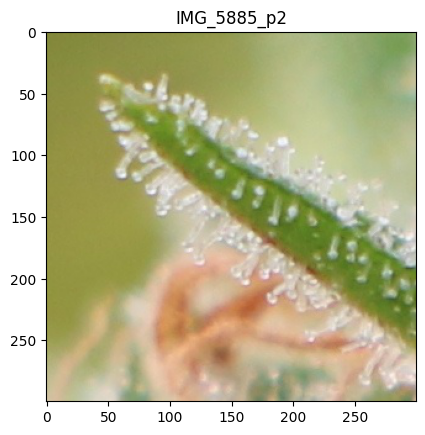

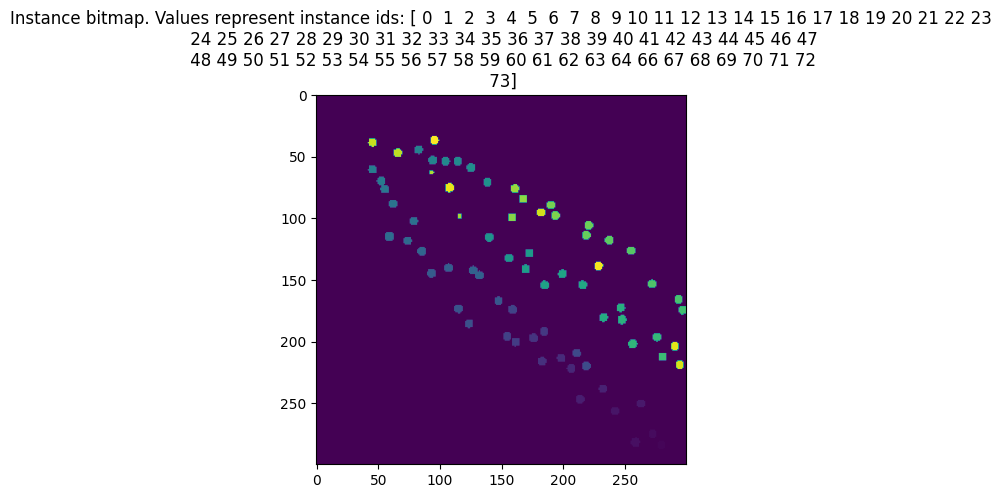

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
patches_path = "/content/drive/MyDrive/trichomes counting project/trichomes image patches/trichomes_patches_Camera"
pictures_paths = {'/content/drive/MyDrive/trichomes counting project/trichomes image patches/trichomes_patches_Camera/IMG_5757/IMG_5757_p27.jpg': 163,
                '/content/drive/MyDrive/trichomes counting project/trichomes image patches/trichomes_patches_Camera/IMG_5883/IMG_5883_p10.jpg': 113, #p35
                '/content/drive/MyDrive/trichomes counting project/trichomes image patches/trichomes_patches_Camera/IMG_5883/IMG_5883_p16.jpg': 103, #p45
                '/content/drive/MyDrive/trichomes counting project/trichomes image patches/trichomes_patches_Camera/IMG_5883/IMG_5883_p9.jpg': 140,
                '/content/drive/MyDrive/trichomes counting project/trichomes image patches/trichomes_patches_Camera/IMG_5884/IMG_5884_p24.jpg': 75,
                '/content/drive/MyDrive/trichomes counting project/trichomes image patches/trichomes_patches_Camera/IMG_5884/IMG_5884_p12.jpg': 45, #p37
                '/content/drive/MyDrive/trichomes counting project/trichomes image patches/trichomes_patches_Camera/IMG_5884/IMG_5884_p9.jpg': 86,
                '/content/drive/MyDrive/trichomes counting project/trichomes image patches/trichomes_patches_Camera/IMG_5885/IMG_5885_p2.jpg': 72,
                '/content/drive/MyDrive/trichomes counting project/trichomes image patches/trichomes_patches_Camera/IMG_5885/IMG_5885_p20.jpg': 81,
                '/content/drive/MyDrive/trichomes counting project/trichomes image patches/trichomes_patches_Camera/IMG_5885/IMG_5885_p3.jpg': 85,
                '/content/drive/MyDrive/trichomes counting project/trichomes image patches/trichomes_patches_Camera/IMG_5885/IMG_5885_p20.jpg': 82}
good_indexes = [1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
instance_bitmap = None
for index in good_indexes:
    # plot one example
    if index == 18:
        image, instance_bitmap, total, name = plot_trichomes(index)
        print(instance_bitmap)
        start_name = "_".join(name.split('_')[:2])
        pictures_paths[f'{patches_path}/{start_name}/{name}.jpg'] = total
  #  save_image_and_matrix(image, instance_bitmap, f'{name}_total_{total}')

In [ ]:
%rm -rf data

In [ ]:
!zip -r /content/data.zip /content/data

  adding: content/data/ (stored 0%)
  adding: content/data/IMG_5757_p27_total_163_data/ (stored 0%)
  adding: content/data/IMG_5757_p27_total_163_data/IMG_5757_p27_total_163.jpg (deflated 1%)
  adding: content/data/IMG_5757_p27_total_163_data/IMG_5757_p27_total_163.npy (deflated 99%)
  adding: content/data/IMG_5885_p2_total_72_data/ (stored 0%)
  adding: content/data/IMG_5885_p2_total_72_data/IMG_5885_p2_total_72.npy (deflated 99%)
  adding: content/data/IMG_5885_p2_total_72_data/IMG_5885_p2_total_72.jpg (deflated 2%)
  adding: content/data/IMG_5885_p38_total_82_data/ (stored 0%)
  adding: content/data/IMG_5885_p38_total_82_data/IMG_5885_p38_total_82.npy (deflated 99%)
  adding: content/data/IMG_5885_p38_total_82_data/IMG_5885_p38_total_82.jpg (deflated 1%)
  adding: content/data/IMG_5885_p3_total_85_data/ (stored 0%)
  adding: content/data/IMG_5885_p3_total_85_data/IMG_5885_p3_total_85.jpg (deflated 1%)
  adding: content/data/IMG_5885_p3_total_85_data/IMG_5885_p3_total_85.npy (deflate

In [ ]:
df = pd.DataFrame(instance_bitmap)

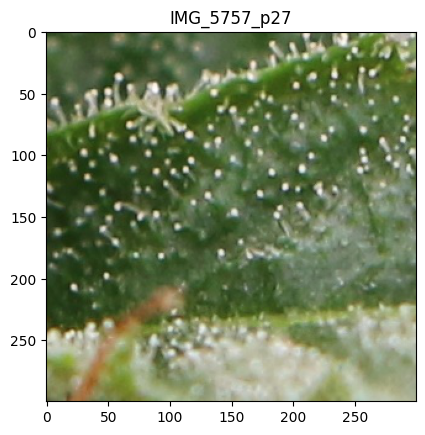

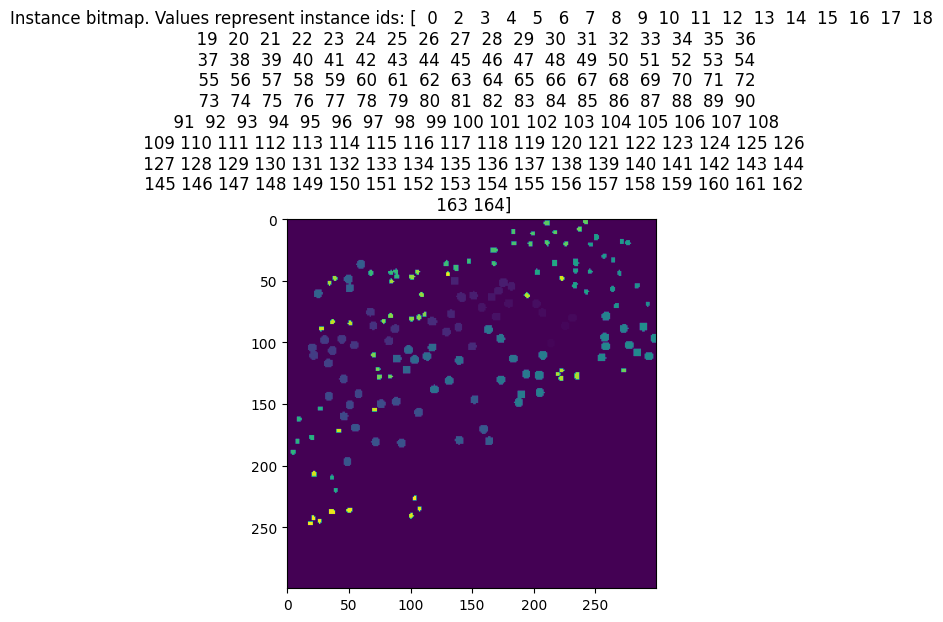

In [ ]:
image, instance_bitmap, total, name = plot_trichomes(1)

In [ ]:
type(instance_bitmap)

numpy.ndarray

In [ ]:
unique_values = np.unique(instance_bitmap[13])
print(unique_values)

[  0  91 119]
